# 1) Pull in Data and Convert to Monthly

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2) Create columns
  - Current stock price, and difference in stock price, whether it would went up or down over the next month, option premium

In [5]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [6]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = 0.08*df['Adj Close']

# 3) Pull in X data, normalize and build a LogReg on column 2

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [9]:
y = df.loc[:"2023-09-30","Target"].copy()

In [10]:
df = df.loc[:"2023-09-30",:].copy()

In [11]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

# 4) Add columns, prediction and profits

In [12]:
y_pred = logreg.predict(X)

In [13]:
df['Predictions'] = y_pred

In [14]:
df['Profits'] = 0

In [15]:
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1), "Profits"] = df["Premium"]

/tmp/ipykernel_266/1259187282.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.77095115e-03 7.84186244e-03 4.21454877e-03 5.14728665e-03
 3.52368116e-03 3.73094141e-03 4.97456849e-03 5.04365563e-03
 7.01275885e-03 8.25644612e-03 1.12964630e-02 1.16764343e-02
 1.39564288e-02 9.63825047e-03 5.63095748e-03 6.73641026e-03
 6.84003949e-03 6.84003949e-03 7.04729855e-03 6.84003949e-03
 4.80185091e-03 4.14546520e-03 4.35278714e-03 5.14728665e-03
 5.56187153e-03 6.08002186e-03 6.39097750e-03 6.90912664e-03
 7.80731916e-03 8.36007774e-03 8.63642514e-03 9.25827146e-03
 9.56916332e-03 1.10545897e-02 1.11928272e-02 1.53382897e-02
 1.78255463e-02 2.18661308e-02 2.24196649e-02 2.28348732e-02
 2.99315524e-02 1.83313918e-02 2.30531311e-02 2.22636890e-02
 2.28202534e-02 2.31442904e-02 2.22799635e-02 2.10782790e-02
 2.00128174e-02 2.19087696e-02 2.23790503e-02 2.51126790e-02
 1.92344832e-02 1.92964506e-02 2.23470569e-02 2.34761

In [17]:
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1), "Profits"] = (100*df['Diff']) + df["Premium"]

# 5) Plot profits over time

[]

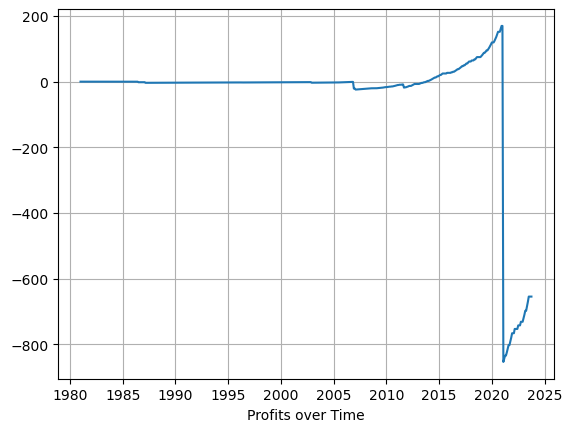

In [18]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Profits over Time")
plt.plot()

# 6) Create a loop that stores total profits over time

# 7) What is the optimal threshold and plot the total profits for this model.